In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import warnings
warnings.filterwarnings("ignore")
RANDOM_STATE = 42
plt.style.use('default')
sns.set_context("notebook")

In [3]:
DATA_PATH = "flood.csv"
df = pd.read_csv(DATA_PATH)
print("Loaded dataset:", DATA_PATH)
print("Shape:", df.shape)
df.head()

Loaded dataset: flood.csv
Shape: (50000, 21)


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [4]:
# Week 1 Task - Basic info & checks
print("Info:")
print(df.info())
print("\nDescribe:")
display(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulne

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000



Missing values per column:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Data types:
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int

Target column stats:


,FloodProbability
count,50000.000000
mean,0.499660
std,0.050034
min,0.285000
25%,0.465000
50%,0.500000
75%,0.535000
max,0.725000


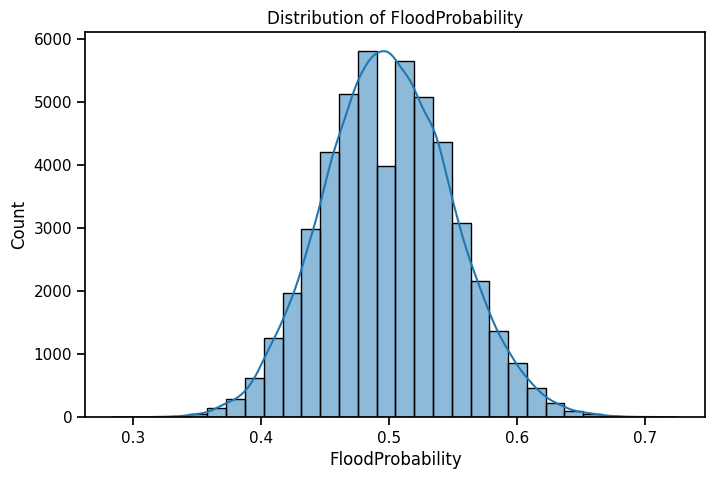

In [5]:
target = "FloodProbability"
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in dataset")
print("Target column stats:")
display(df[target].describe())
plt.figure(figsize=(8,5))
sns.histplot(df[target], bins=30, kde=True)
plt.title("Distribution of FloodProbability")
plt.xlabel(target)
plt.show()

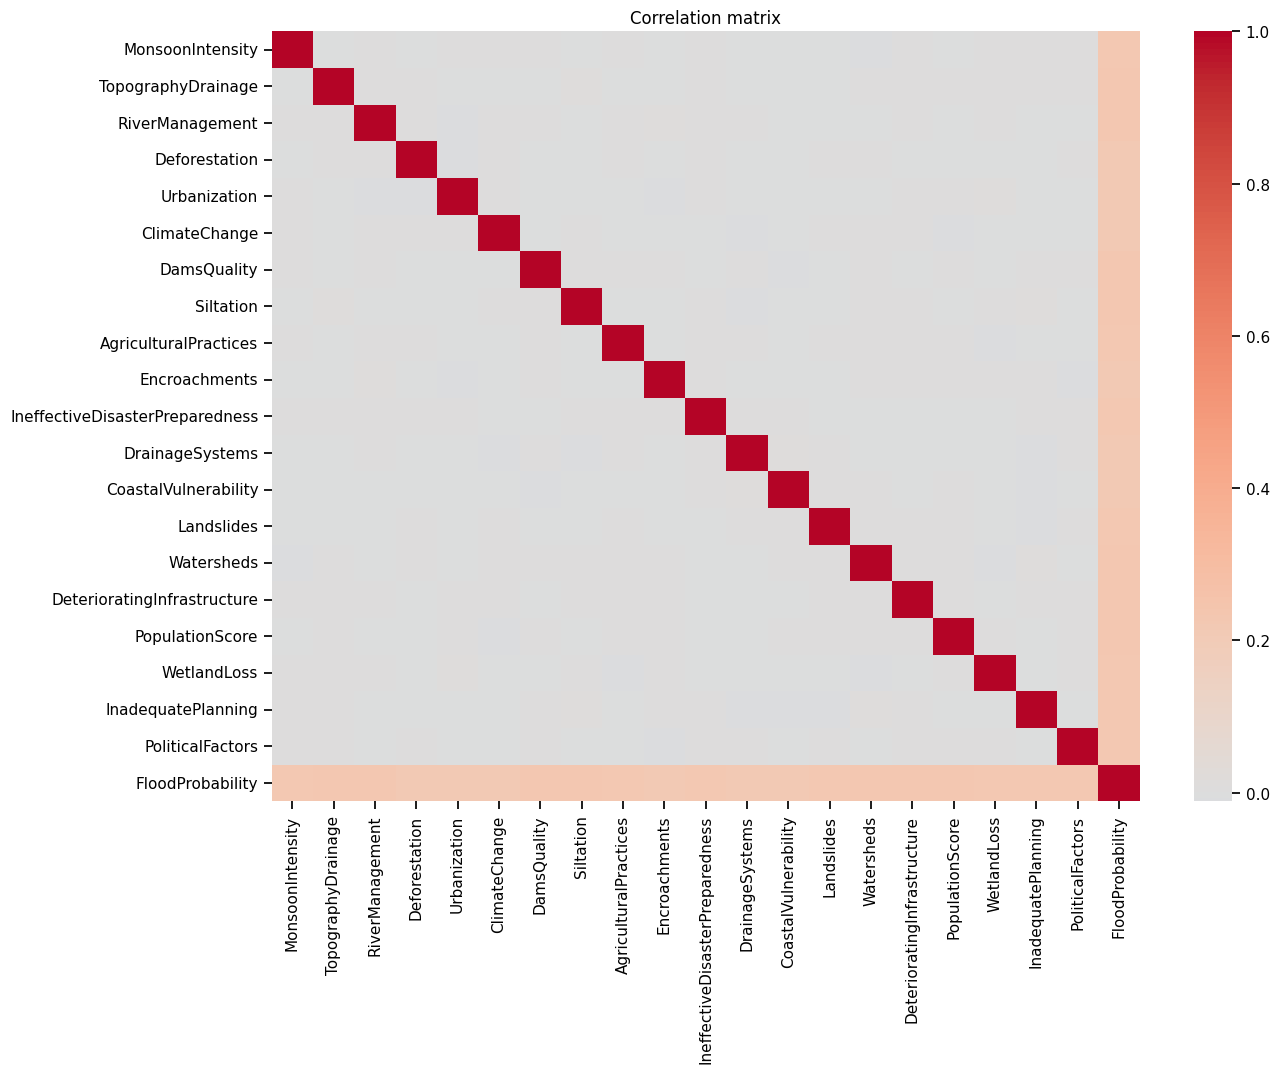

Top correlations with target:


,FloodProbability
DeterioratingInfrastructure,0.229444
TopographyDrainage,0.229414
RiverManagement,0.228917
Watersheds,0.228152
DamsQuality,0.227467
PopulationScore,0.226928
Siltation,0.226544
IneffectiveDisasterPreparedness,0.225126
PoliticalFactors,0.225009
MonsoonIntensity,0.224081


In [6]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation matrix")
plt.show()

corr_with_target = corr[target].drop(target).sort_values(key=lambda x: x.abs(), ascending=False)
print("Top correlations with target:")
display(corr_with_target.head(15))

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,50000.0,4.99148,2.236834,0.0,3.0,5.0,6.0,16.0
TopographyDrainage,50000.0,4.98410,2.246488,0.0,3.0,5.0,6.0,18.0
RiverManagement,50000.0,5.01594,2.231310,0.0,3.0,5.0,6.0,16.0
Deforestation,50000.0,5.00848,2.222743,0.0,3.0,5.0,6.0,17.0
Urbanization,50000.0,4.98906,2.243159,0.0,3.0,5.0,6.0,17.0
ClimateChange,50000.0,4.98834,2.226761,0.0,3.0,5.0,6.0,17.0
DamsQuality,50000.0,5.01536,2.245000,0.0,3.0,5.0,6.0,16.0
Siltation,50000.0,4.98860,2.232642,0.0,3.0,5.0,6.0,16.0
AgriculturalPractices,50000.0,5.00612,2.234588,0.0,3.0,5.0,6.0,16.0
Encroachments,50000.0,5.00638,2.241633,0.0,3.0,5.0,6.0,18.0


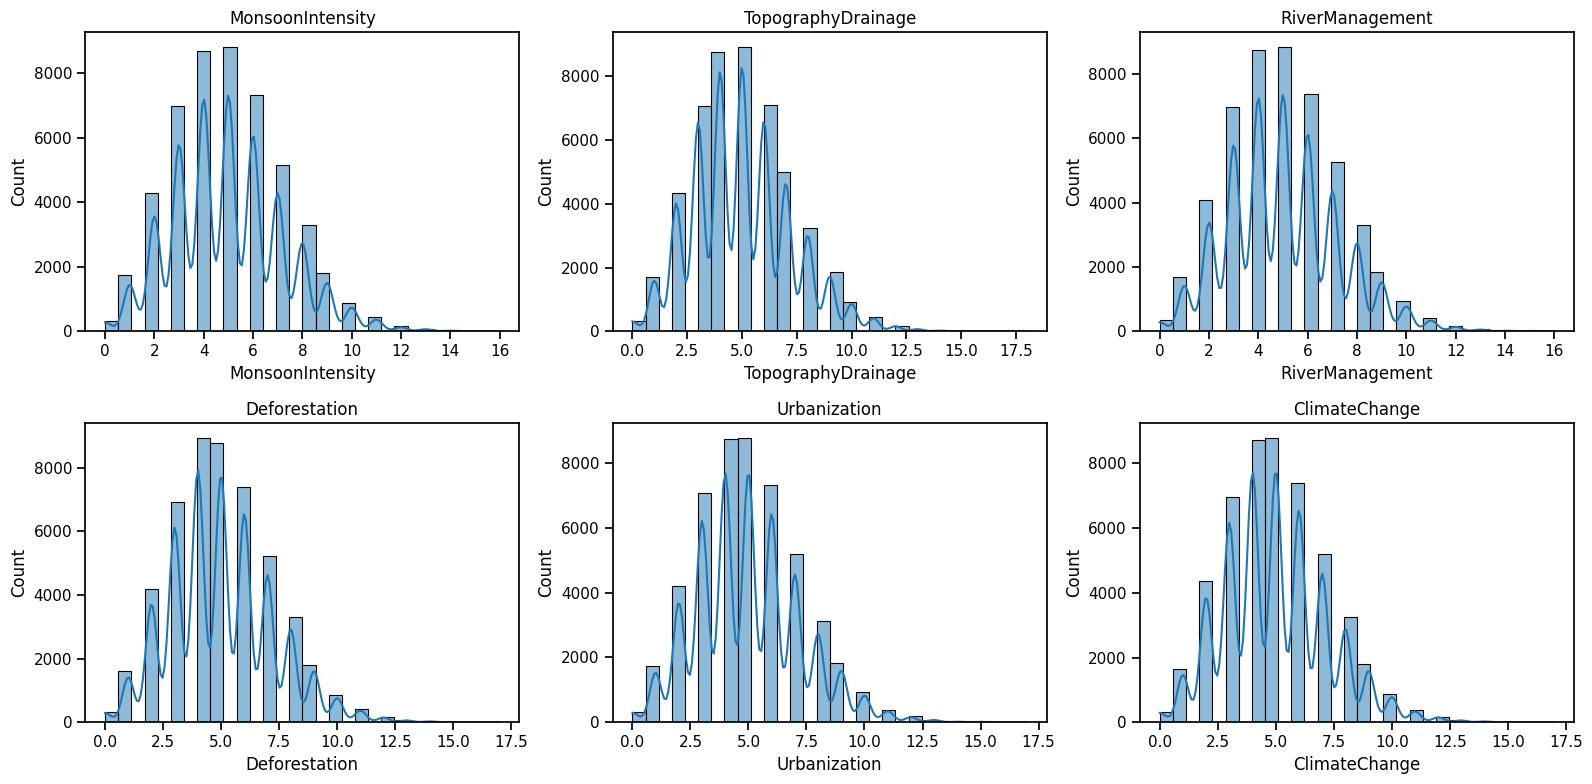

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove(target)
display(df[numeric_cols].describe().T)

cols_to_plot = numeric_cols[:6]
fig, axes = plt.subplots(2, 3, figsize=(16,8))
axes = axes.flatten()
for ax, col in zip(axes, cols_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [9]:
X = df.drop(columns=[target])
Y = df[target].values
print("X shape:", X.shape, "Y shape:", Y.shape)

X shape: (50000, 20) Y shape: (50000,)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=RANDOM_STATE)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (40000, 20) Test shape: (10000, 20)


In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

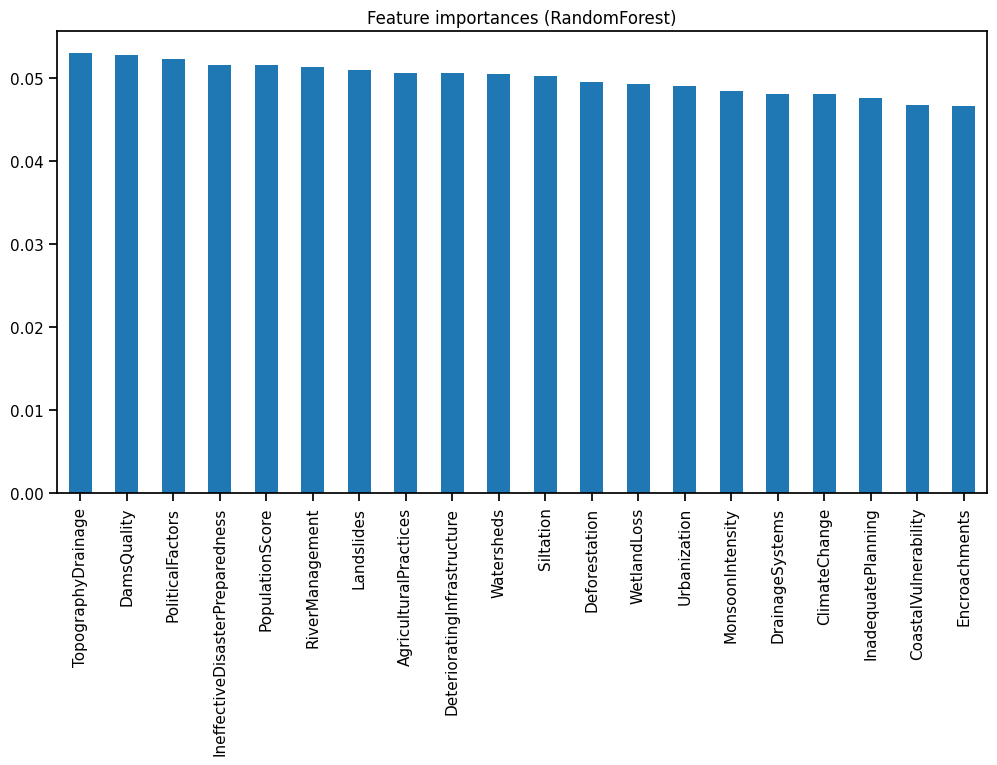

Top 10 features by importance:


,0
TopographyDrainage,0.053020
DamsQuality,0.052789
PoliticalFactors,0.052384
IneffectiveDisasterPreparedness,0.051635
PopulationScore,0.051615
RiverManagement,0.051396
Landslides,0.050995
AgriculturalPractices,0.050673
DeterioratingInfrastructure,0.050642
Watersheds,0.050545


In [12]:
rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train, Y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_sorted.plot(kind='bar')
plt.title("Feature importances (RandomForest)")
plt.show()

print("Top 10 features by importance:")
display(importances_sorted.head(10))

In [13]:
TOP_K = 10
top_features = importances_sorted.head(TOP_K).index.tolist()
print("Selected top features:", top_features)

X_train_sel = X_train_scaled[top_features]
X_test_sel  = X_test_scaled[top_features]
print("Selected data shapes:", X_train_sel.shape, X_test_sel.shape)

Selected top features: ['TopographyDrainage', 'DamsQuality', 'PoliticalFactors', 'IneffectiveDisasterPreparedness', 'PopulationScore', 'RiverManagement', 'Landslides', 'AgriculturalPractices', 'DeterioratingInfrastructure', 'Watersheds']
Selected data shapes: (40000, 10) (10000, 10)


In [19]:
rf_baseline = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
rf_baseline.fit(X_train_sel, Y_train)
Y_pred_train = rf_baseline.predict(X_train_sel)
Y_pred_test  = rf_baseline.predict(X_test_sel)

def regression_metrics(Y_true, Y_pred):
    r2 = r2_score(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = mean_squared_error(Y_true, Y_pred)
    return {"r2": r2, "mae": mae, "rmse": rmse}

print("Train Metrics:", regression_metrics(Y_train, Y_pred_train))
print("Test Metrics:", regression_metrics(Y_test, Y_pred_test))

Train Metrics: {'r2': 0.9247459321007068, 'mae': 0.01082868567559525, 'rmse': 0.00018862367423858758}
Test Metrics: {'r2': 0.4411426491632272, 'mae': 0.029843814250000003, 'rmse': 0.0013918821507839583}


In [20]:
cv_scores = cross_val_score(rf_baseline, X_train_sel, Y_train, cv=5, scoring='r2', n_jobs=-1)
print("CV R2 scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))

CV R2 scores: [0.47230581 0.46066679 0.44989136 0.44876764 0.46695784]
Mean CV R2: 0.4597178889378921


In [21]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 8, 12],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid = GridSearchCV(RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1),
                    param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(X_train_sel, Y_train)
print("Best params:", grid.best_params_)
best_rf = grid.best_estimator_

Y_pred_test_grid = best_rf.predict(X_test_sel)
print("Grid Search Test Metrics:", regression_metrics(Y_test, Y_pred_test_grid))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Grid Search Test Metrics: {'r2': 0.44697701627990316, 'mae': 0.029658220398256566, 'rmse': 0.0013773511592193616}


In [22]:
gbr = GradientBoostingRegressor(random_state=RANDOM_STATE)
gbr.fit(X_train_sel, Y_train)
Y_pred_gbr = gbr.predict(X_test_sel)
print("GradientBoosting Test Metrics:", regression_metrics(Y_test, Y_pred_gbr))

GradientBoosting Test Metrics: {'r2': 0.4557186322737333, 'mae': 0.029416054510709683, 'rmse': 0.0013555794150477913}


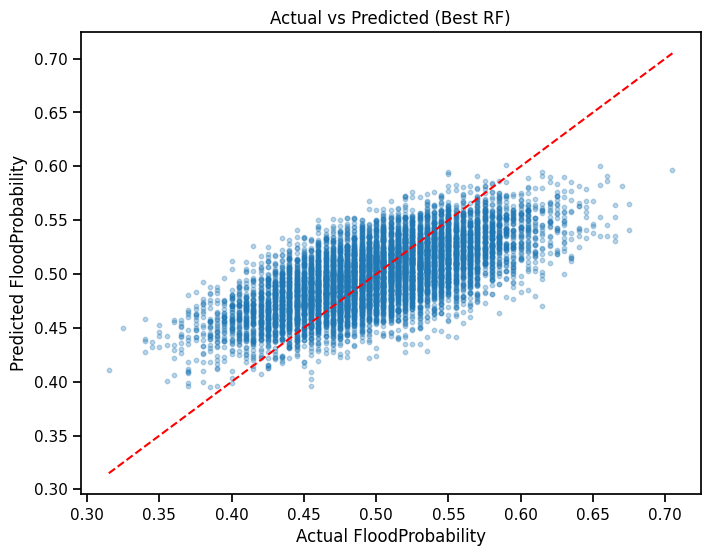

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred_test_grid, alpha=0.3, s=10)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual FloodProbability")
plt.ylabel("Predicted FloodProbability")
plt.title("Actual vs Predicted (Best RF)")
plt.show()

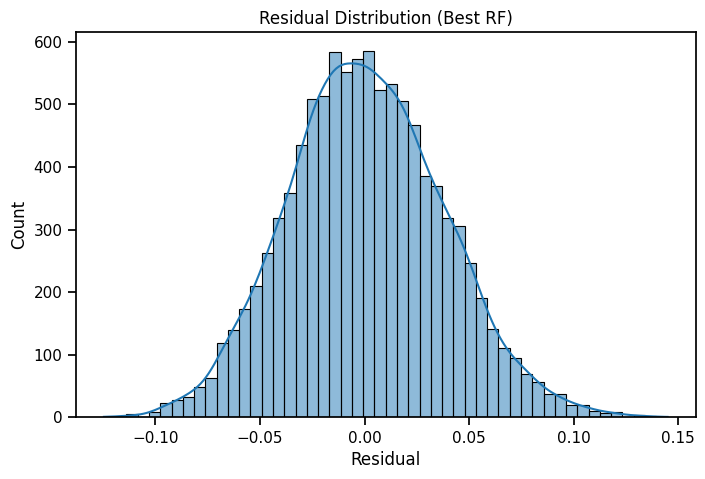

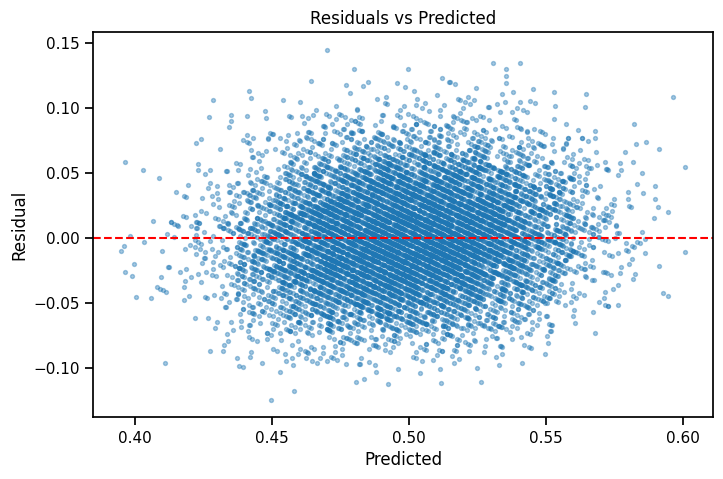

In [24]:
residuals = Y_test - Y_pred_test_grid
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residual Distribution (Best RF)")
plt.xlabel("Residual")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(Y_pred_test_grid, residuals, s=8, alpha=0.4)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")
plt.show()

In [25]:
OUTPUT_DIR = "model_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

joblib.dump(best_rf, os.path.join(OUTPUT_DIR, "rf_best_model.joblib"))
joblib.dump(scaler, os.path.join(OUTPUT_DIR, "minmax_scaler.joblib"))
with open(os.path.join(OUTPUT_DIR, "selected_features.txt"), "w") as f:
    for feat in top_features:
        f.write(feat + "\n")

print("Saved model and artifacts to:", OUTPUT_DIR)

Saved model and artifacts to: model_outputs


In [26]:
print("Final model test metrics (Best RF):")
print(regression_metrics(Y_test, Y_pred_test_grid))
print("\nTop features used:")
for i, feat in enumerate(top_features, 1):
    print(f"{i}. {feat} (importance: {importances_sorted[feat]:.4f})")

Final model test metrics (Best RF):
{'r2': 0.44697701627990316, 'mae': 0.029658220398256566, 'rmse': 0.0013773511592193616}

Top features used:
1. TopographyDrainage (importance: 0.0530)
2. DamsQuality (importance: 0.0528)
3. PoliticalFactors (importance: 0.0524)
4. IneffectiveDisasterPreparedness (importance: 0.0516)
5. PopulationScore (importance: 0.0516)
6. RiverManagement (importance: 0.0514)
7. Landslides (importance: 0.0510)
8. AgriculturalPractices (importance: 0.0507)
9. DeterioratingInfrastructure (importance: 0.0506)
10. Watersheds (importance: 0.0505)
